In [1]:
import os
import numpy as np
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
%matplotlib inline

params = {'kernel_type': 'linear',
          'test_size': 0.15,
          'subsample_size': 300,
          'pca' : False,
          'random_state': 123}

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [ ]:
#--FASHION SCATTER FUNCTION
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", 16))

    # create a scatter plot.
    f = plt.figure(figsize=(20, 20))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="b"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [2]:
#-- MAKE INPUTS AND OUTPUTS

nominal_converter = {'class': {"present" : 1, "absent" : 0}}

# read dataset and replace nominal with numerical data
df = pd.read_csv('BNG_heart-statlog.csv')
#convert nominal to numerical
df.replace(nominal_converter, inplace = True)


# nov 26th
# split into inputs and outputs
features = df.iloc[:params['subsample_size'], :-1]
labels = df['class'][:params['subsample_size']]

C:\Users\augus\Anaconda3\envs\jupyter\lib\site-packages\pandas\plotting\_matplotlib\hist.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds


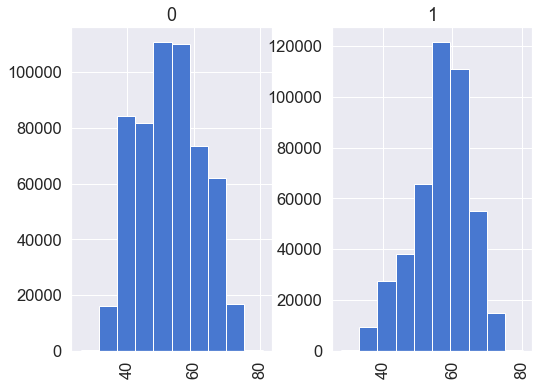

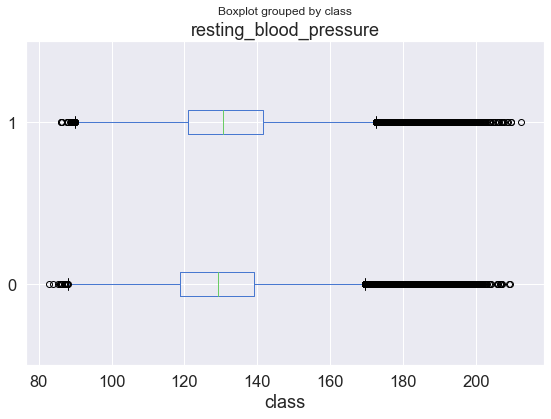

In [3]:
#-- HISTOGRAMS AND PLOTS

fig = plt.figure(figsize = (8,6))
plt.title('Age of patients grouped by class')
df.hist(ax=fig.gca(),  column="age", by="class")
plt.show()

fig = plt.figure(figsize = (9,6))
plt.title('Resting blood pressure of patients grouped by class')
df.boxplot(ax=fig.gca(),column="resting_blood_pressure", by="class", vert=False)
plt.show()

In [4]:
'''from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne_file = 'tsne_' + str(subsection) + '.pickle'

if (not os.path.exists(tsne_file)):
    print('Creating TSNE File')
    tSNE = TSNE(random_state=123).fit_transform(features)
    
    with open(tsne_file, 'wb+') as output_file:
        pickle.dump(tSNE, output_file)
else:
    print('Loading from TSNE File')
    with open(tsne_file, 'rb') as input_file:
        tSNE = pickle.load(input_file)
        
print ('Time elapsed: {} seconds'.format(time.time()-time_start))

fashion_scatter(tSNE, np.multiply(np.array(labels), 4))'''

"from sklearn.manifold import TSNE\nimport time\n\ntime_start = time.time()\ntsne_file = 'tsne_' + str(subsection) + '.pickle'\n\nif (not os.path.exists(tsne_file)):\n    print('Creating TSNE File')\n    tSNE = TSNE(random_state=123).fit_transform(features)\n    \n    with open(tsne_file, 'wb+') as output_file:\n        pickle.dump(tSNE, output_file)\nelse:\n    print('Loading from TSNE File')\n    with open(tsne_file, 'rb') as input_file:\n        tSNE = pickle.load(input_file)\n        \nprint ('Time elapsed: {} seconds'.format(time.time()-time_start))\n\nfashion_scatter(tSNE, np.multiply(np.array(labels), 4))"

PCA done! Time elapsed: 0.003996133804321289 seconds
[0.74782992 0.14174955 0.08802666 0.02005831]


C:\Users\augus\Anaconda3\envs\jupyter\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\augus\Anaconda3\envs\jupyter\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 1440x1440 with 1 Axes>,
 [Text(-7.545189880228122, -10.117584090439765, '0'), Text(nan, nan, '1')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


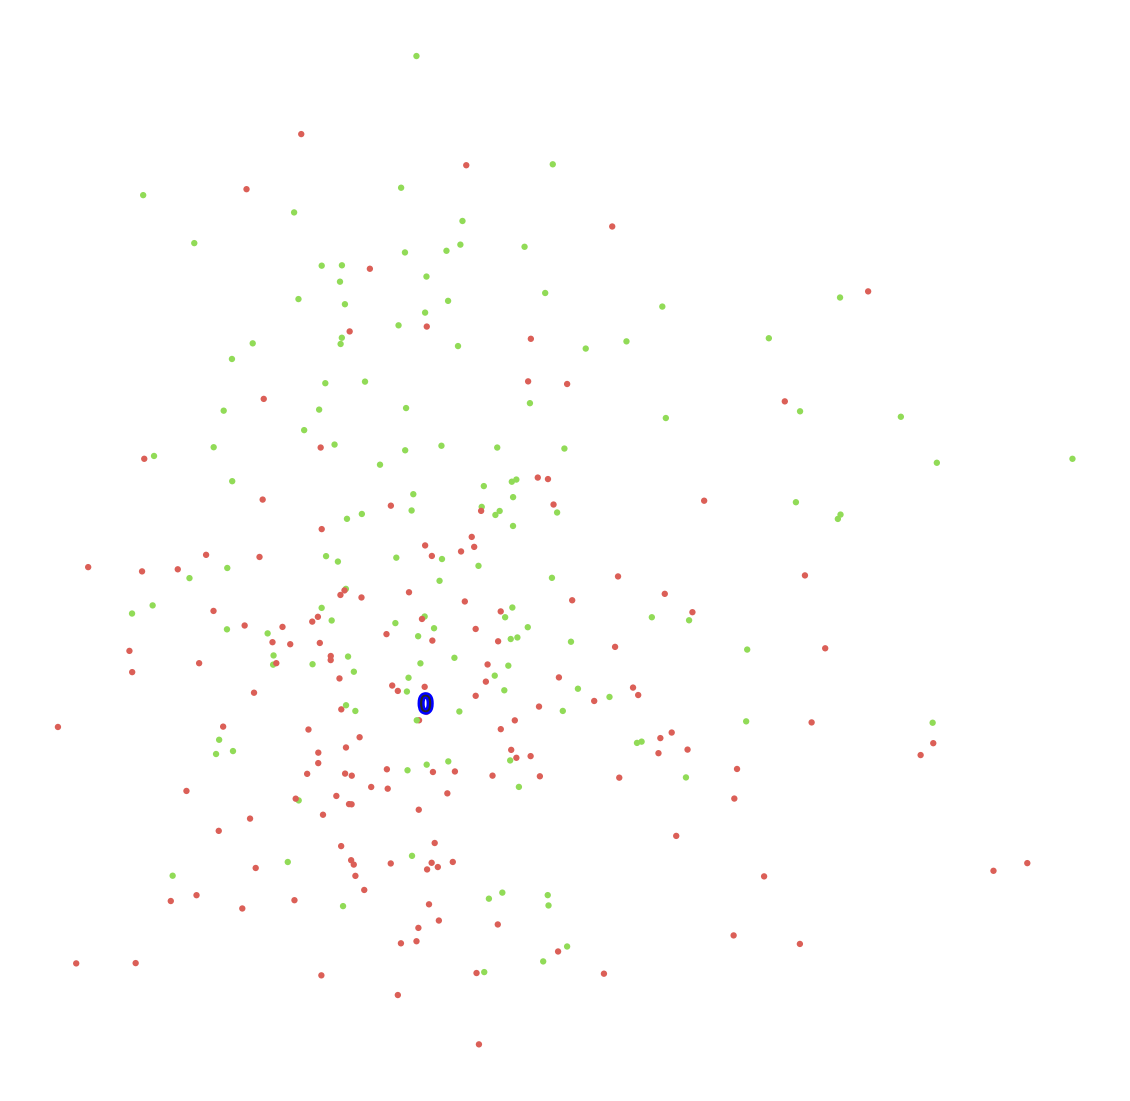

In [5]:
#-- PCA
time_start = time.time()
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df.iloc[:params['subsample_size'], :])

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))


pca_df = pd.DataFrame(columns = ['pc1', 'pc2'])
pca_df['pc1'] = pca_result[:,0]
pca_df['pc2'] = pca_result[:,1]
pca_df['pc3'] = pca_result[:,2]
pca_df['pc4'] = pca_result[:,3]
print(pca.explained_variance_ratio_)
# plot PCA first 2 components
fashion_scatter(pca_df[['pc1','pc2']].values, np.multiply(np.array(labels), 4))

In [6]:
'''# apply tSNE to the Principal Components
time_start = time.time()
pca_tSNE = TSNE(random_state=123).fit_transform(pca_result)
print ('Time elapsed: {} seconds'.format(time.time()-time_start))

fashion_scatter(pca_tSNE, np.multiply(np.array(labels), 4))'''

"# apply tSNE to the Principal Components\ntime_start = time.time()\npca_tSNE = TSNE(random_state=123).fit_transform(pca_result)\nprint ('Time elapsed: {} seconds'.format(time.time()-time_start))\n\nfashion_scatter(pca_tSNE, np.multiply(np.array(labels), 4))"

In [7]:
# remove if we are not using it
def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

In [8]:
#-- MODEL AND CONFUSION MATRIX

if params['pca']:
    train_features, test_features, train_labels, test_labels = train_test_split(pca_df[['pc1', 'pc2']].values,
                                                                                labels,
                                                                                test_size=params['test_size'],
                                                                                random_state=params['random_state'])

else:
    train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                                labels,
                                                                                test_size=params['test_size'],
                                                                                random_state=params['random_state'])


model_file = 'svm_model_' + str(params['subsample_size']) + \
    '_pca' if params['pca'] else '_no_pca' + \
    '.pickle'


details = "\n"
print(params, details)

time_start = time.time()

# make model if not exists, load if does
if (not os.path.exists(model_file)):
    print('Creating Model')
    model = svm.SVC(kernel=params['kernel_type'])

    model.fit(train_features, train_labels)

    with open(model_file, 'wb+') as output_file:
        pickle.dump(model, output_file)
else:
    print('Loading Model from File')
    with open(model_file, 'rb') as input_file:
        model = pickle.load(input_file)

print ('Fitting done, time: {} seconds'.format(time.time() - time_start))

predictions = model.predict(test_features)

print("Accuracy:", metrics.accuracy_score(test_labels, predictions))
print("Precision:", metrics.precision_score(test_labels, predictions))
print("Recall:", metrics.recall_score(test_labels, predictions))

confusion_mat = confusion_matrix(test_labels, predictions)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            linewidths=.5,
            xticklabels=["Absent", "Present"],
            yticklabels=["Absent", "Present"],
            ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

{'kernel_type': 'linear', 'test_size': 0.15, 'subsample_size': 300, 'pca': False, 'random_state': 123} 

Loading Model from File
Fitting done, time: 0.003954172134399414 seconds


ValueError: X.shape[1] = 13 should be equal to 2, the number of features at training time